In [2]:
%pylab inline
import pandas
import seaborn as sns
import numpy

Populating the interactive namespace from numpy and matplotlib


In [42]:
tpm = pandas.read_csv('all_NumReads_counts_norm_filthi_all.csv',index_col=0)
tpm = tpm.loc[tpm.mean(axis=1)>0.1]

# CNTL_0019 is an outlier
tpm.drop('CNTL_0019',axis=1,inplace=True)

In [43]:
info = pandas.read_csv('../CTE_sample_info.csv')
info.index = [_[:9] for _ in info.ID]
info = info.loc[info.index.intersection(tpm.columns)]

info_rin6 = pandas.read_csv('CTE_sample_info_RINgt6.csv')
info_rin6.index = [_[:9] for _ in info_rin6.ID]
info_rin6 = info_rin6.loc[info_rin6.index.intersection(tpm.columns)]

info_rin7 = pandas.read_csv('CTE_sample_info_RINgt7.csv')
info_rin7.index = [_[:9] for _ in info_rin7.ID]
info_rin7 = info_rin7.loc[info_rin7.index.intersection(tpm.columns)]

In [44]:
log_tpm = numpy.log10(tpm+1)
log_tpm = log_tpm[sorted(tpm.columns)]
#log_tpm = log_tpm.iloc[:,log_tpm.median().argsort()]

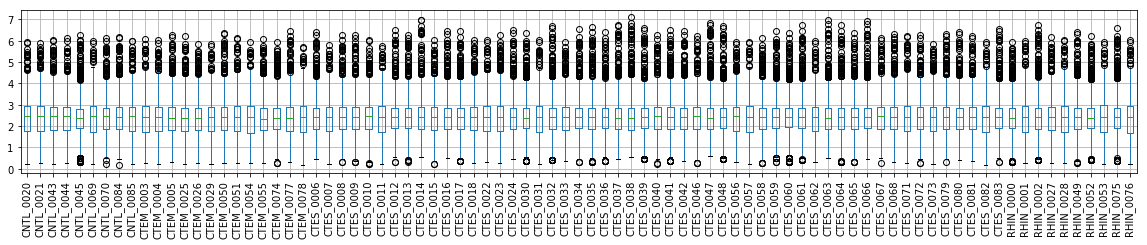

In [45]:
#log_tpm.hist(figsize=(70,30),bins=50);
log_tpm.boxplot(figsize=(20,3),rot=90)

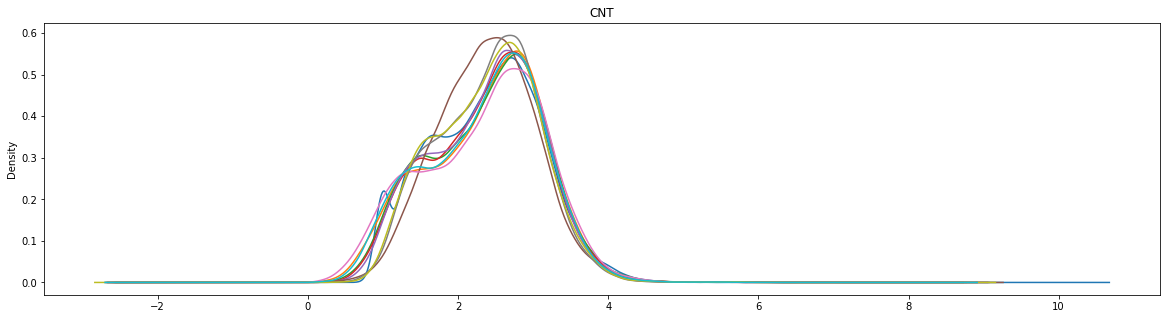

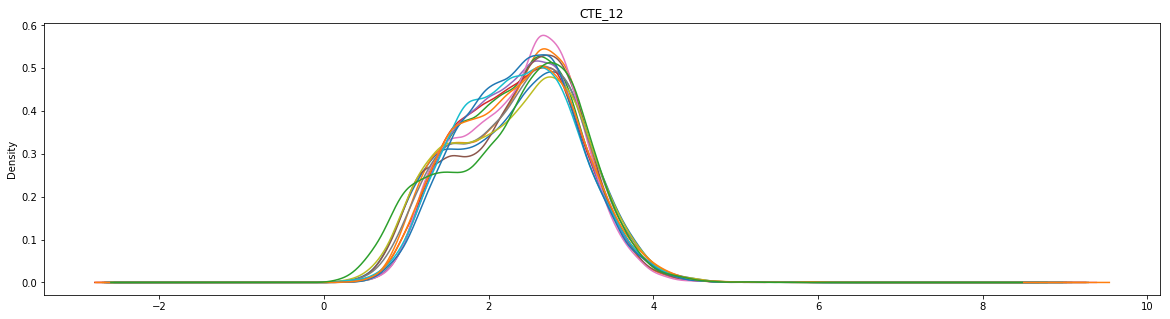

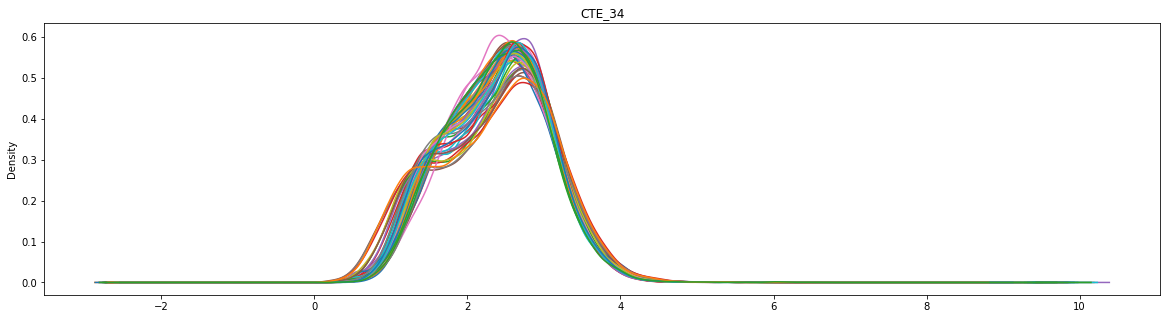

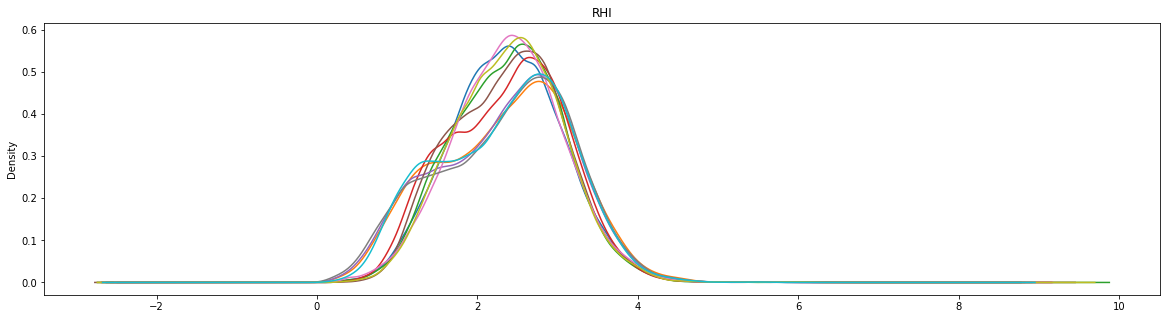

In [39]:
for k,samples in info.groupby('Status') :
    log_tpm[samples.index].plot.kde(figsize=(20,5),legend=False)
    title(k)

Text(0, 0.5, 'Mean TMP')

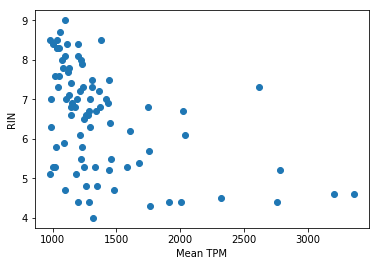

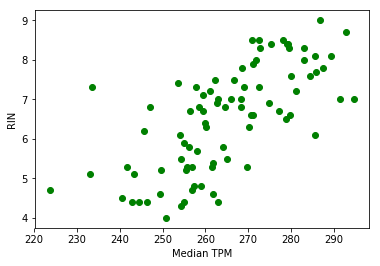

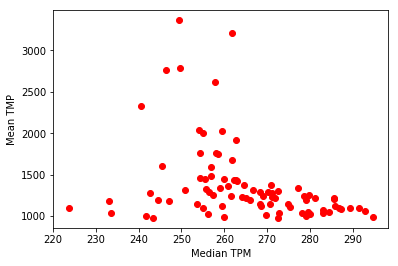

In [46]:
figure()
plot(tpm.mean(),info.RIN,'o')
xlabel('Mean TPM')
ylabel('RIN')
figure()
plot(tpm.median(),info.RIN,'go')
xlabel('Median TPM')
ylabel('RIN')
figure()
plot(tpm.median(),tpm.mean(),'ro')
xlabel('Median TPM')
ylabel('Mean TMP')

Text(0.5, 0.98, '')

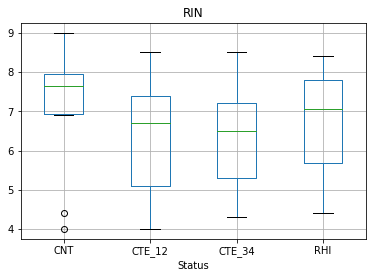

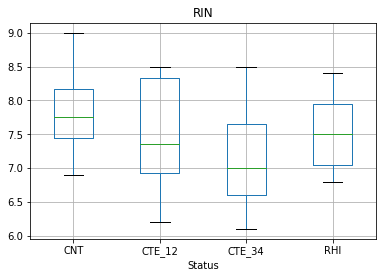

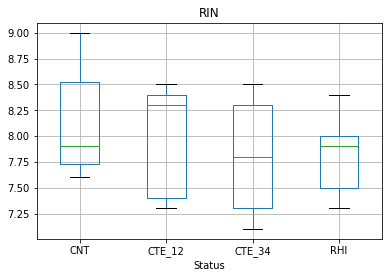

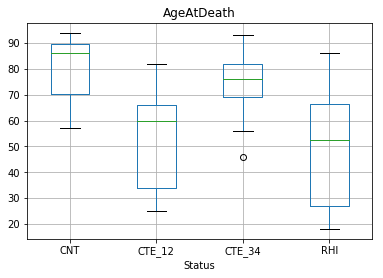

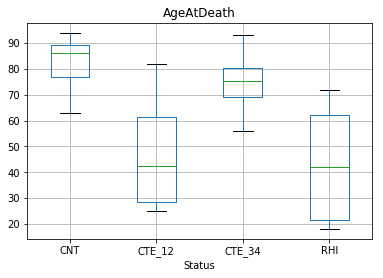

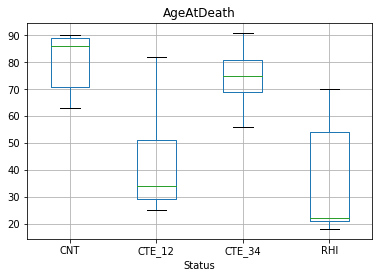

In [38]:
info.boxplot(column=['RIN',],by='Status')
gcf().suptitle('')
info_rin6.boxplot(column=['RIN'],by='Status')
gcf().suptitle('')
info_rin7.boxplot(column=['RIN'],by='Status')
gcf().suptitle('')

info.boxplot(column=['AgeAtDeath',],by='Status')
gcf().suptitle('')
info_rin6.boxplot(column=['AgeAtDeath'],by='Status')
gcf().suptitle('')
info_rin7.boxplot(column=['AgeAtDeath'],by='Status')
gcf().suptitle('')

In [244]:
sample_sizes = pandas.concat(
    [info.groupby('Status').agg('count').ID,info_rin6.groupby('Status').agg('count').ID,info_rin7.groupby('Status').agg('count').ID],
    axis=1
)
sample_sizes.columns = ('All','RIN>6','RIN>7')
sample_sizes

All  RIN>6  RIN>7
Status                   
CNT      10      8      6
CTE_12   13      8      5
CTE_34   53     32     15
RHI      10      7      5

Status
CNT        8
CTE_12     8
CTE_34    32
RHI        7
Name: ID, dtype: int64

Status
CNT        6
CTE_12     5
CTE_34    15
RHI        5
Name: ID, dtype: int64

In [4]:
palette = sns.color_palette("bright")

def do_fc_plots(fn, fc_field, sig_field, c=palette[0]) :
    f, axs = subplots(1,3,figsize=(20,3))
    de = pandas.read_csv(fn)
    de['log_baseMean'] = numpy.log10(de.baseMean)
    de[fc_field].hist(bins=200,ax=axs[0],color=c)
    axs[0].set_xlabel(fc_field)
    axs[0].set_ylabel('Number of genes')
    axs[0].set_title(fc_field)
    de[de[sig_field]<0.05][fc_field].hist(bins=50,ax=axs[1],color=c)
    axs[1].set_xlabel(fc_field)
    axs[1].set_ylabel('Number of genes')
    axs[1].set_title(fc_field+' padj < 0.05')
    if (de[sig_field]<0.05).sum() > 0 :
        de[de[sig_field]<0.05].plot(kind='scatter',x=fc_field,y='log_baseMean',ax=axs[2],color=c)
    axs[2].set_title('{} padj<0.05 DE genes'.format((de[sig_field]<0.05).sum()))
    grid()
    #return de

/home/labadorf/miniconda3/envs/cte_fastqprep/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


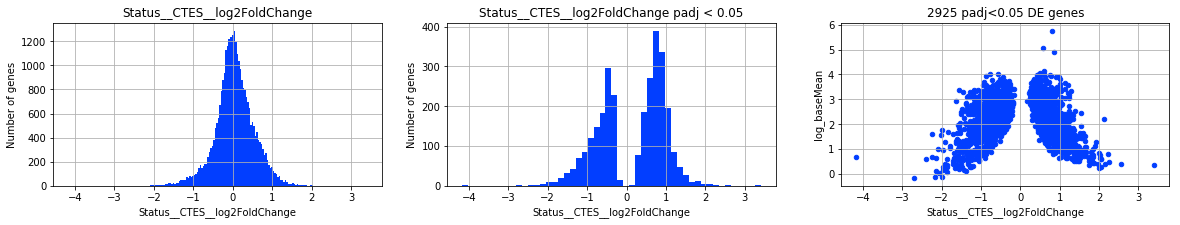

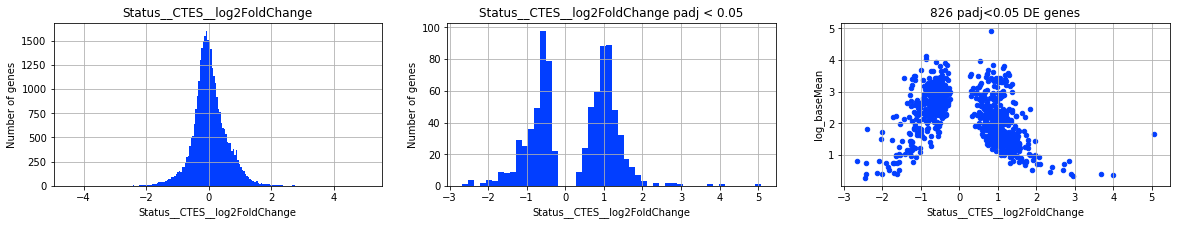

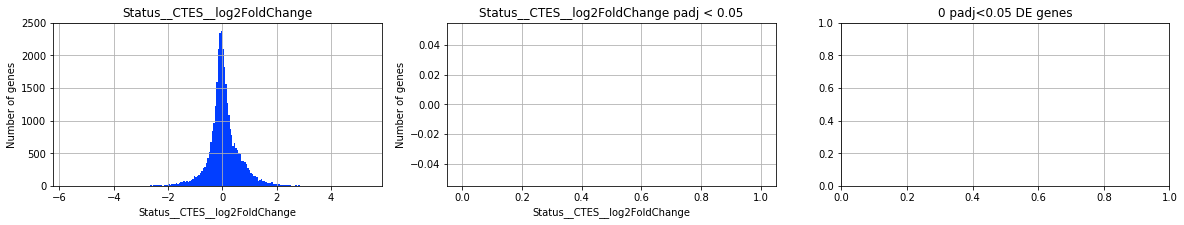

In [43]:
do_fc_plots('CTES_CNTL_all_filtlow_de_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj')
do_fc_plots('CTES_CNTL_RINgt6_filtlow_de_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj')
do_fc_plots('CTES_CNTL_RINgt7_filtlow_de_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj')

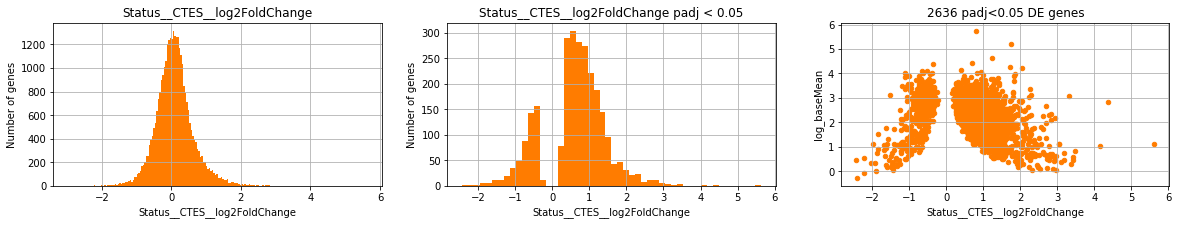

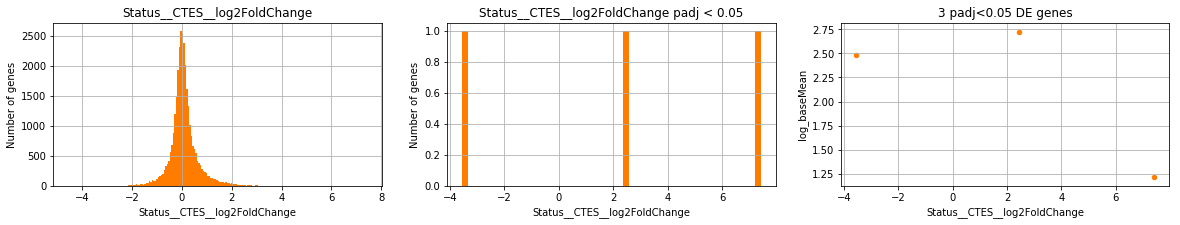

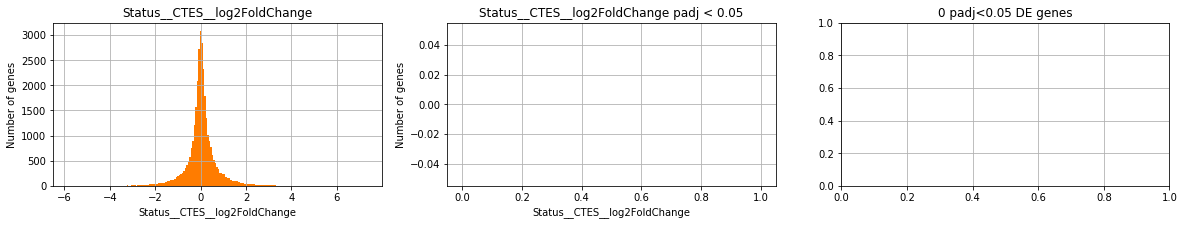

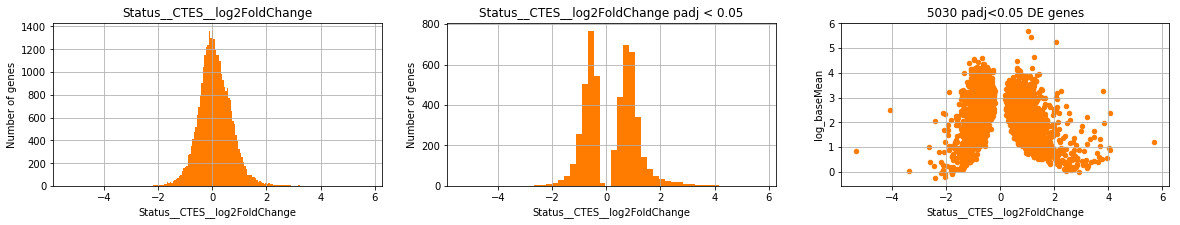

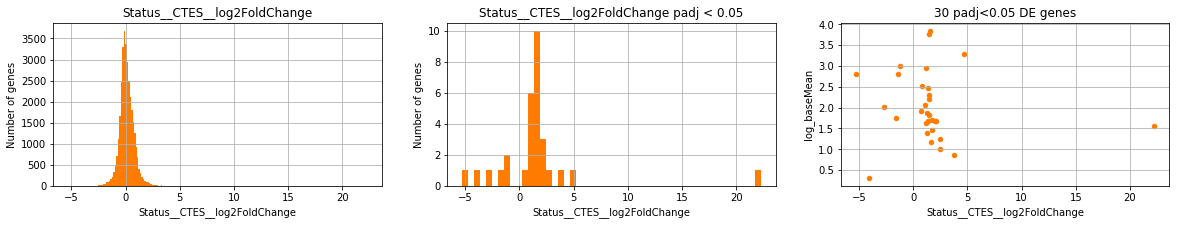

In [39]:
do_fc_plots('CTES_CTEM_all_filtlow_de_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj',c=palette[1])
do_fc_plots('CTES_CTEM_RINgt6_filtlow_de_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj',c=palette[1])
do_fc_plots('CTES_CTEM_RINgt7_filtlow_de_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj',c=palette[1])

do_fc_plots('CTES_CTEM_RINgt6_filtlow_dered_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj',c=palette[1])
do_fc_plots('CTES_CTEM_RINgt7_filtlow_dered_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj',c=palette[1])

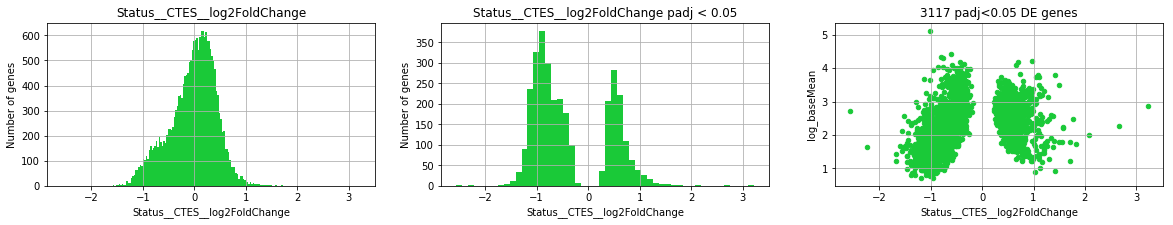

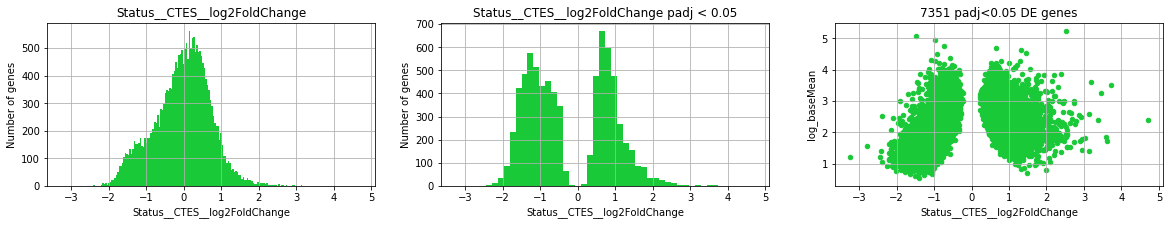

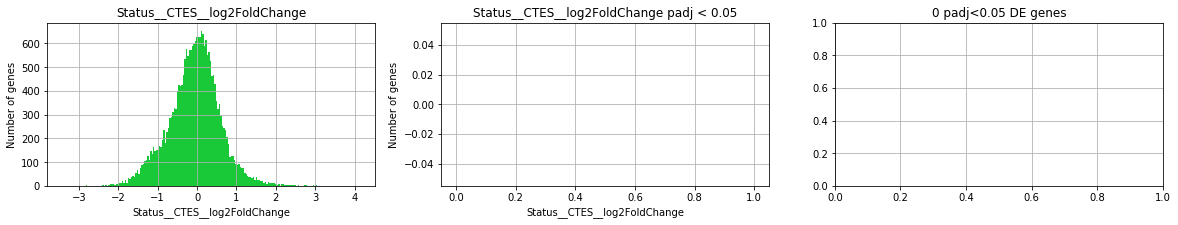

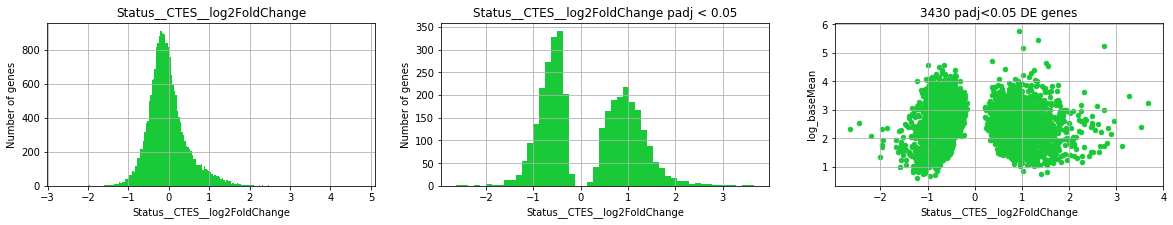

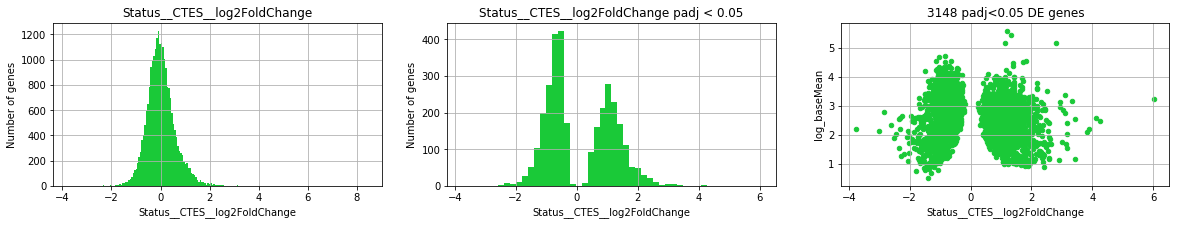

In [9]:
do_fc_plots('CTES_RHIN_all_de_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj',c=palette[2])
do_fc_plots('CTES_RHIN_RINgt6_de_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj',c=palette[2])
do_fc_plots('CTES_RHIN_RINgt7_de_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj',c=palette[2])

do_fc_plots('CTES_RHIN_RINgt6_dered_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj',c=palette[2])
do_fc_plots('CTES_RHIN_RINgt7_dered_annot.csv','Status__CTES__log2FoldChange','Status__CTES__padj',c=palette[2])

/home/labadorf/miniconda3/envs/cte_fastqprep/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


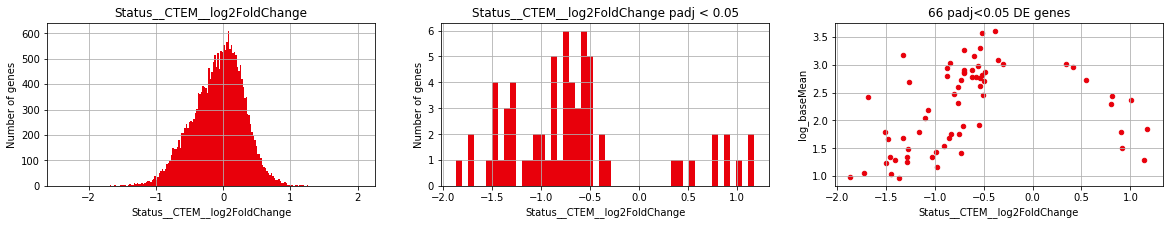

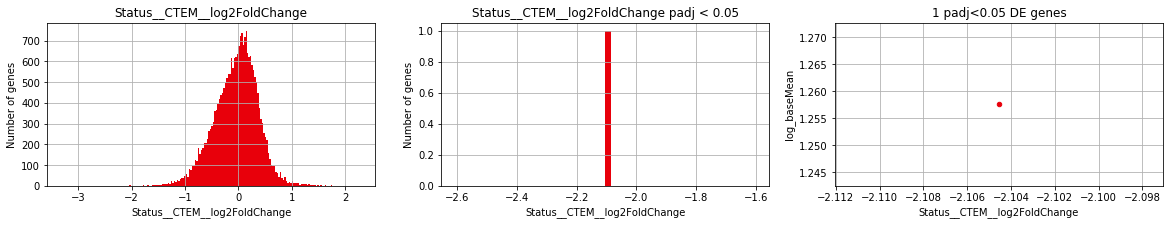

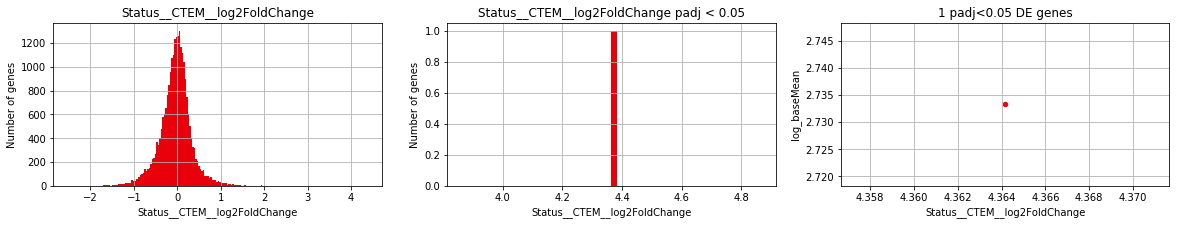

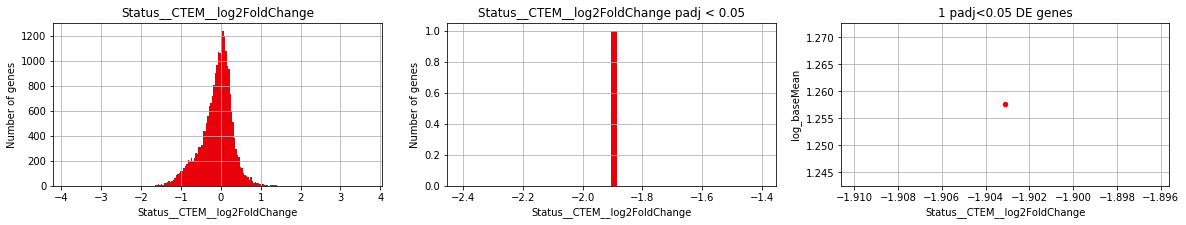

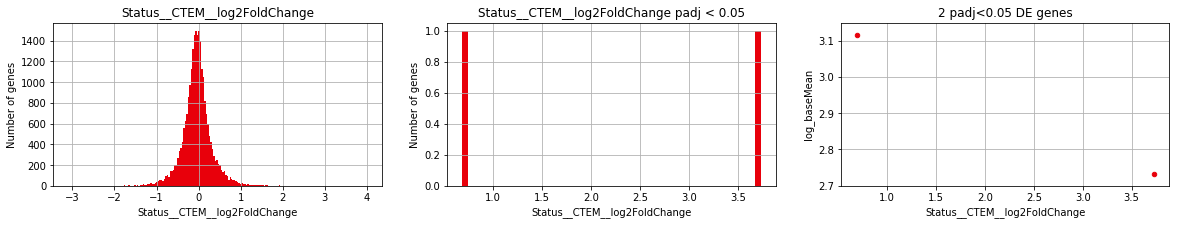

In [11]:
do_fc_plots('CTEM_RHIN_all_de_annot.csv','Status__CTEM__log2FoldChange','Status__CTEM__padj',c=palette[3])
do_fc_plots('CTEM_RHIN_RINgt6_de_annot.csv','Status__CTEM__log2FoldChange','Status__CTEM__padj',c=palette[3])
do_fc_plots('CTEM_RHIN_RINgt7_de_annot.csv','Status__CTEM__log2FoldChange','Status__CTEM__padj',c=palette[3])

do_fc_plots('CTEM_RHIN_RINgt6_dered_annot.csv','Status__CTEM__log2FoldChange','Status__CTEM__padj',c=palette[3])
do_fc_plots('CTEM_RHIN_RINgt7_dered_annot.csv','Status__CTEM__log2FoldChange','Status__CTEM__padj',c=palette[3])

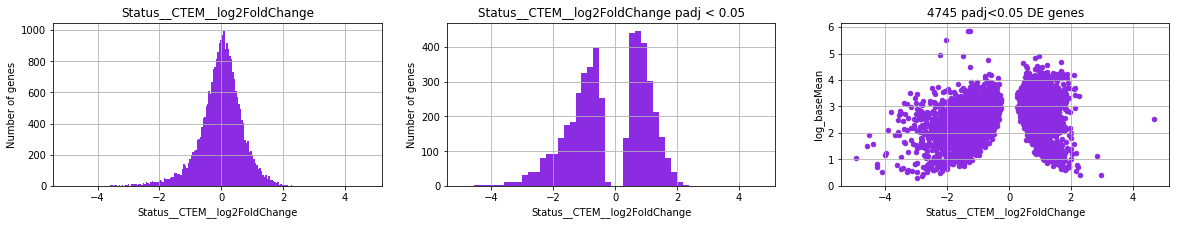

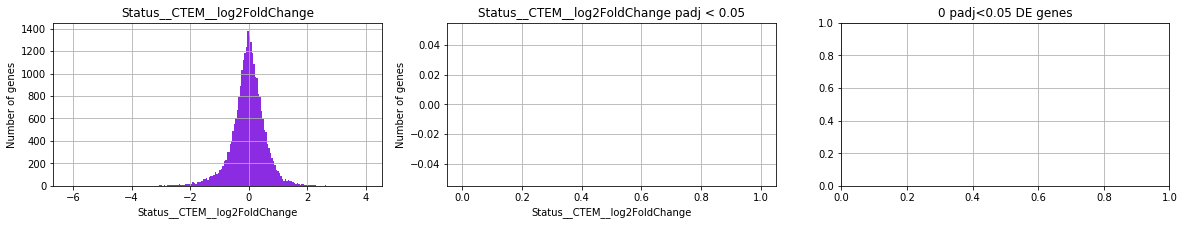

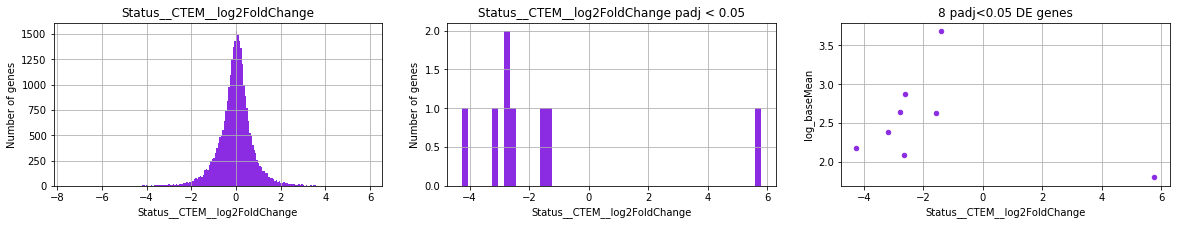

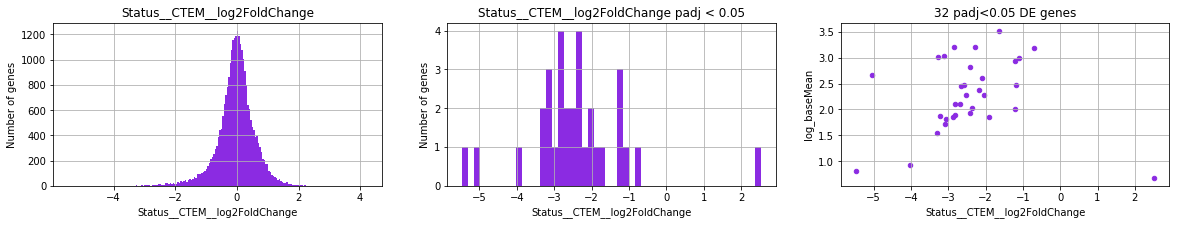

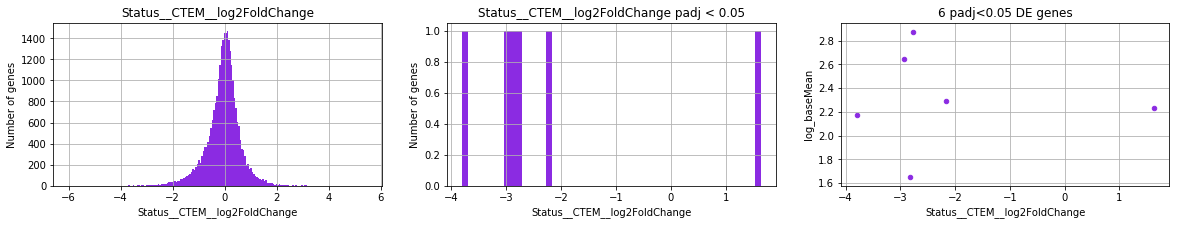

In [5]:
do_fc_plots('CTEM_CNTL_all_de_annot.csv','Status__CTEM__log2FoldChange','Status__CTEM__padj',c=palette[4])
do_fc_plots('CTEM_CNTL_RINgt6_de_annot.csv','Status__CTEM__log2FoldChange','Status__CTEM__padj',c=palette[4])
do_fc_plots('CTEM_CNTL_RINgt7_de_annot.csv','Status__CTEM__log2FoldChange','Status__CTEM__padj',c=palette[4])
  
do_fc_plots('CTEM_CNTL_RINgt6_dered_annot.csv','Status__CTEM__log2FoldChange','Status__CTEM__padj',c=palette[4])
do_fc_plots('CTEM_CNTL_RINgt7_dered_annot.csv','Status__CTEM__log2FoldChange','Status__CTEM__padj',c=palette[4])